Link to dataset: https://data.cdc.gov/NCHS/Conditions-contributing-to-deaths-involving-corona/hk9y-quqm 

data only within US


## Quick EDA on the CDC comorbidity dataset

In [192]:
#import libraries

import pandas as pd
from sodapy import Socrata #used for interacting with SODA API
import matplotlib.pyplot as plt

In [3]:
# help(Socrata) #show all the stuff you can do with Socrata class

In [4]:
#define important variables
DATASET_ID = 'hk9y-quqm'
APP_TOKEN = None

#create an interface to the cdc website, to access datasets
client = Socrata('data.cdc.gov', APP_TOKEN)

## Querying with SODA API
For tags to query by, see the CDC API here: https://dev.socrata.com/foundry/data.cdc.gov/hk9y-quqm

For documentation on SQL-like querying, see here: https://dev.socrata.com/docs/queries/

In [13]:
#an example query to the dataset
#just get all of them, honestly
results = client.get(DATASET_ID, limit = 12500)
len(results)

12330

In [119]:
#convert this list into a Pandas DataFrame
results_df = pd.DataFrame.from_records(results) #convert list of dictionaries into DataFrame
results_df

,data_as_of,start_week,end_week,state,condition_group,condition,icd10_codes,age_group,number_covid19_deaths,flag
0,2020-11-04T00:00:00.000,2020-02-01T00:00:00.000,2020-10-31T00:00:00.000,US,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,160,NaN
1,2020-11-04T00:00:00.000,2020-02-01T00:00:00.000,2020-10-31T00:00:00.000,US,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,764,NaN
2,2020-11-04T00:00:00.000,2020-02-01T00:00:00.000,2020-10-31T00:00:00.000,US,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,1951,NaN
3,2020-11-04T00:00:00.000,2020-02-01T00:00:00.000,2020-10-31T00:00:00.000,US,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,5526,NaN
4,2020-11-04T00:00:00.000,2020-02-01T00:00:00.000,2020-10-31T00:00:00.000,US,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,13332,NaN
...,...,...,...,...,...,...,...,...,...,...
12325,2020-11-04T00:00:00.000,2020-02-01T00:00:00.000,2020-10-31T00:00:00.000,PR,COVID-19,COVID-19,U071,65-74,193,NaN
12326,2020-11-04T00:00:00.000,2020-02-01T00:00:00.000,2020-10-31T00:00:00.000,PR,COVID-19,COVID-19,U071,75-84,202,NaN
12327,2020-11-04T00:00:00.000,2020-02-01T00:00:00.000,2020-10-31T00:00:00.000,PR,COVID-19,COVID-19,U071,85+,147,NaN
12328,2020-11-04T00:00:00.000,2020-02-01T00:00:00.000,2020-10-31T00:00:00.000,PR,COVID-19,COVID-19,U071,Not stated,0,NaN


Note: when number_covid19_deaths = nan, there are so few deaths (between 1-9) that the actual number is redacted for privacy purposes

In [120]:
results_df.columns

Index(['data_as_of', 'start_week', 'end_week', 'state', 'condition_group',
       'condition', 'icd10_codes', 'age_group', 'number_covid19_deaths',
       'flag'],
      dtype='object')

In [188]:
#quick lookup table to match icd10 code to the condition

icd10_codes = results_df[['condition','icd10_codes']].set_index('icd10_codes')
icd10_codes = icd10_codes.drop_duplicates()
icd10_codes

,condition
icd10_codes,
J09-J18,Influenza and pneumonia
J40-J47,Chronic lower respiratory diseases
J80,Adult respiratory distress syndrome
J96,Respiratory failure
R09.2,Respiratory arrest
"J00-J06, J20-J39, J60-J70, J81-J86, J90-J95, J97-J99, U04",Other diseases of the respiratory system
I10-I15,Hypertensive diseases
I20-I25,Ischemic heart disease
I46,Cardiac arrest


In [189]:
results_df['condition'].unique()

array(['Influenza and pneumonia', 'Chronic lower respiratory diseases',
       'Adult respiratory distress syndrome', 'Respiratory failure',
       'Respiratory arrest', 'Other diseases of the respiratory system',
       'Hypertensive diseases', 'Ischemic heart disease',
       'Cardiac arrest', 'Cardiac arrhythmia', 'Heart failure',
       'Cerebrovascular diseases',
       'Other diseases of the circulatory system', 'Sepsis',
       'Malignant neoplasms', 'Diabetes', 'Obesity', 'Alzheimer disease',
       'Vascular and unspecified dementia', 'Renal failure',
       'Intentional and unintentional injury, poisoning, and other adverse events',
       'All other conditions and causes (residual)', 'COVID-19'],
      dtype=object)

In [121]:
results_df['icd10_codes'].unique()

array(['J09-J18', 'J40-J47', 'J80', 'J96', 'R09.2',
       'J00-J06, J20-J39, J60-J70, J81-J86, J90-J95, J97-J99, U04',
       'I10-I15', 'I20-I25', 'I46', 'I44, I45, I47-I49', 'I50', 'I60-I69',
       'I00-I09, I26-I43, I51, I52, I70-I99', 'A40-A41', 'C00-C97',
       'E10-E14', 'E65-E68', 'G30', 'F01, F03', 'N17-N19',
       'S00-T98, V01-X59, X60-X84, X85-Y09, Y10-Y36, Y40-Y89, U01-U03',
       'A00-A39, A42-B99, D00-E07, E15-E64, E70-E90, F00, F02, F04-G26, G31-H95, K00-K93, L00-M99, N00-N16, N20-N98, O00-O99, P00-P96, Q00-Q99, R00-R08, R09.0, R09.1, R09.3, R09.8, R10-R99',
       'U071'], dtype=object)

In [122]:
results_df['condition'].nunique()

23

In [123]:
#time for preprocessing

keep_cols = ['state','condition_group','condition','icd10_codes','age_group','number_covid19_deaths']
results_df = results_df.dropna(subset = ['number_covid19_deaths'])
results_df = results_df[keep_cols]
results_df['number_covid19_deaths'] = results_df['number_covid19_deaths'].astype(int) #make sure that this column is numeric data
results_df

,state,condition_group,condition,icd10_codes,age_group,number_covid19_deaths
0,US,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,160
1,US,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,764
2,US,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,1951
3,US,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,5526
4,US,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,13332
...,...,...,...,...,...,...
12325,PR,COVID-19,COVID-19,U071,65-74,193
12326,PR,COVID-19,COVID-19,U071,75-84,202
12327,PR,COVID-19,COVID-19,U071,85+,147
12328,PR,COVID-19,COVID-19,U071,Not stated,0


In [166]:
#find out what is included under "all other conditions" by looking at the icd10 codes encompassed

other_conditions = results_df[results_df['condition'] == 'All other conditions and causes (residual)']
other_conditions['icd10_codes'].unique()
oc_string = other_conditions['icd10_codes'].iloc[0]
other_conditions = oc_string.split(', ')
other_conditions

['A00-A39',
 'A42-B99',
 'D00-E07',
 'E15-E64',
 'E70-E90',
 'F00',
 'F02',
 'F04-G26',
 'G31-H95',
 'K00-K93',
 'L00-M99',
 'N00-N16',
 'N20-N98',
 'O00-O99',
 'P00-P96',
 'Q00-Q99',
 'R00-R08',
 'R09.0',
 'R09.1',
 'R09.3',
 'R09.8',
 'R10-R99']

Big issue: determining if these are pre-existing conditions or symptoms of covid

In [203]:
#group covid deaths by coinciding condition

covid_conditions = results_df.groupby('condition').agg({'number_covid19_deaths': 'sum'}).iloc[:,0]

#seems like some individuals have multiple conditions
total_deaths = covid_conditions['COVID-19']
cause_deaths = covid_conditions.sum() - total_deaths
print(total_deaths, cause_deaths, total_deaths == cause_deaths)

covid_conditions = covid_conditions.sort_values(ascending = False)
covid_conditions

870545 2505342 False


condition
COVID-19                                                                     870545
All other conditions and causes (residual)                                   450080
Influenza and pneumonia                                                      377626
Respiratory failure                                                          305499
Hypertensive diseases                                                        187171
Diabetes                                                                     142550
Adult respiratory distress syndrome                                          110751
Cardiac arrest                                                               104672
Ischemic heart disease                                                        99300
Vascular and unspecified dementia                                             97423
Sepsis                                                                        82040
Renal failure                                                     

Text(0.5, 1.0, 'Number Covid Deaths related to Condition')

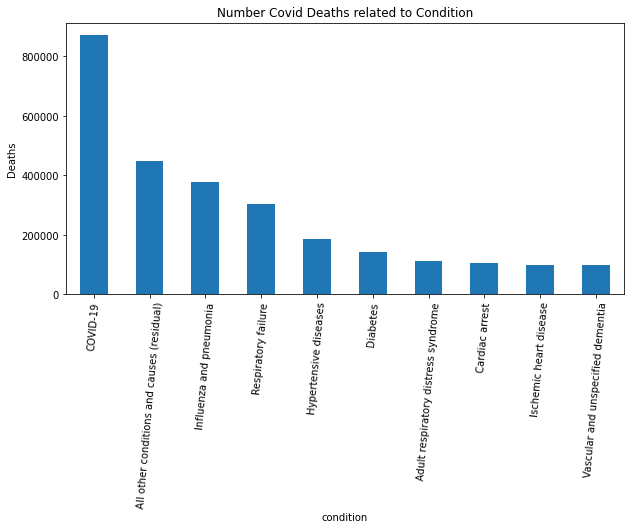

In [219]:
#zooming in on the big 10

plt.figure(figsize = (10,5))
covid_conditions.nlargest(10).plot(kind = 'bar')
plt.xticks(rotation = 85)
plt.ylabel('Deaths')
plt.title('Number Covid Deaths related to Condition')